In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("../data/listings_cleaned.csv")

In [18]:
# Remove the dollar sign and convert the price column to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

In [19]:
pd.set_option('display.max_columns', None)
df.head()

,id,name,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,is_apartment,is_kitchen,is_manhattan,is_subway,is_train,is_quiet,is_furnished,is_heart,is_modern,is_wifi,is_renovated,is_laundry,is_desk,is_park,is_shop,is_luxury,is_safe,is_elevator,is_garden,is_parking,is_stylish,is_village,is_downtown,is_backyard,is_bus,is_transportation,is_museum,is_rooftop,is_cafe,is_dishwasher,is_airport,is_netflix,is_balcony,is_fridge,is_doorman,is_bar,is_oven,is_restaurant,is_old,is_supermarket,is_comfortable,host_position,type_apartment,type_entire,type_floor,type_hotel,type_dorm,type_villa,type_resort,type_train,type_hostel,type_home/apt,type_guest,type_vacation,type_guesthouse,type_tent,type_boat,type_aparthotel,type_cave,type_camper/rv,type_bed,type_building,type_unit,type_religious,type_breakfast,type_houseboat,type_condo,type_castle,type_suite,type_cottage,type_lighthouse,type_private,type_barn,type_in-law,type_place,type_room,type_tower,type_particular,type_rental,type_bungalow,type_home,type_townhouse,type_boutique,type_and,type_serviced,type_earthen,type_farm,type_stay,type_in,type_chalet,type_kezhan,type_casa,type_tiny,type_shared,type_loft,shared_bathroom,num_baths,has_alarm,has_dryer,has_wifi,has_smoke,has_heating,has_kitchen,has_water,has_coffee,has_conditioning,has_hangers,has_tv,has_parking,has_iron,has_shampoo,has_refrigerator,has_silverware,has_dishes,has_cooking,has_linens,has_microwave,has_workspace,has_oven,has_stove,has_extinguisher,has_washer,has_aid,has_pillows,has_blankets,has_bathtub,has_storage,has_table,has_freezer,has_soap,has_security,has_kettle,has_luggage,has_dishwasher,has_laundromat,has_elevator,has_conditioner,has_pets,has_shower,has_wine,has_glasses,has_toaster,has_lockbox,has_closet,has_ac,has_books,has_balcony,has_backyard,has_gym,has_furniture,has_netflix,has_ethernet,has_grill,has_bbq,has_fan,has_amazon,has_guards,has_fridge,has_games,has_skyline,has_fireplace,has_toys,has_breakfast,has_garage,has_hbo,has_pool,has_barbecue,has_tub,has_disney,has_bluetooth,has_wardrobe,imputed_review_score
0,9630344,Rental unit in Brooklyn · ★4.80 · 1 bedroom ·...,47783628,2015-10-30,0,1.0,2.0,1,0,Bushwick,Brooklyn,40.68457,-73.91181,private room in rental unit,Private room,1,1.0,1.0,65.0,30,30,t,29,59,89,364,5,0,0,2016-08-14,2018-04-30,4.80,f,1,0,1,0,0.06,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,"New York, NY",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3533741,Rental unit in New York · 1 bedroom · 1 bed · ...,17791294,2014-07-07,0,1.0,1.0,1,1,Hell's Kitchen,Manhattan,40.76878,-73.98719,private room in rental unit,Private room,2,1.0,1.0,110.0,30,1125,f,0,0,0,0,0,0,0,NaN,NaN,4.83,f,1,0,1,0,0.00,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Hell's Kitchen, New York, NY",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1.0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,9731039,Rental unit in Queens · Studio · 1 bed · 1 bath,50213378,2015-11-30,0,1.0,1.0,1,0,Su

In [20]:
# Create Monthly Revenue: Price Multiplied by Number of Days Occupied
# Revenue per available room (RevPAR) is a performance metric used in the hotel industry. 
# It is calculated by multiplying a hotel's average daily room rate (ADR) by its occupancy rate.

df["RevPAR"] = (df['price'] * (30 - df['availability_30']))

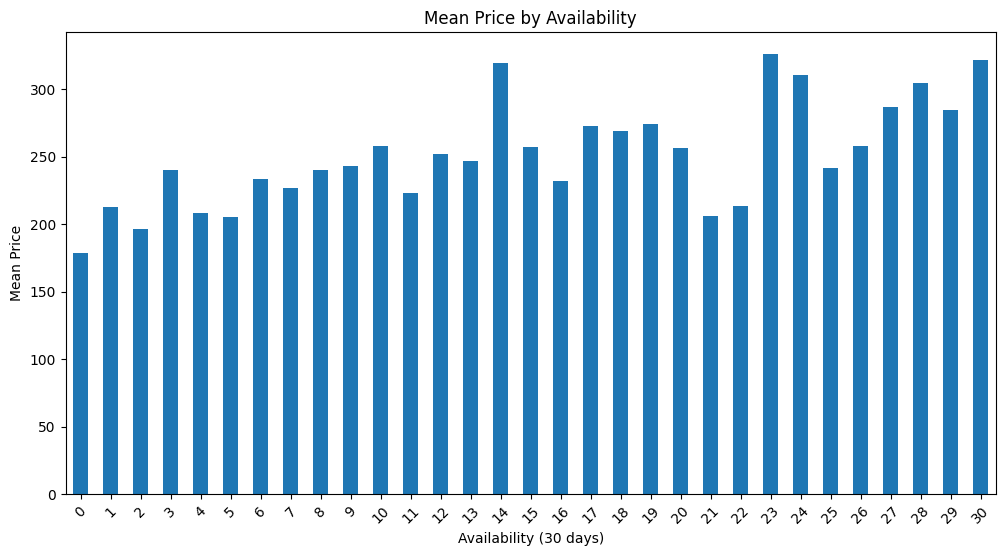

In [22]:
# Calculate the mean price for each 'availability_30'
mean_prices = df.groupby('availability_30')['price'].mean().sort_index()

# Plot the means
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
mean_prices.plot(kind='bar')  # Bar plot; you can also use 'line' for a line plot

# Add title and labels
plt.title('Mean Price by Availability')
plt.xlabel('Availability (30 days)')
plt.ylabel('Mean Price')

# Optionally, rotate the x-tick labels for better legibility
plt.xticks(rotation=45)

# Display the plot
plt.show()



c:\Users\heiwi\Documents\tdt4259-main\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\heiwi\Documents\tdt4259-main\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\heiwi\Documents\tdt4259-main\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


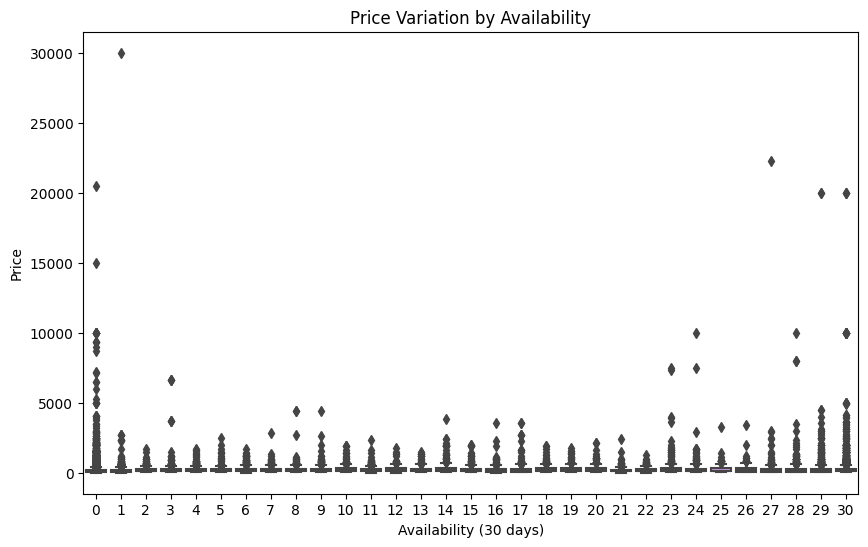

In [31]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='availability_30', y='price', data=df)

# Set the title and labels
plt.title('Price Variation by Availability')
plt.xlabel('Availability (30 days)')
plt.ylabel('Price')

# Display the plot
plt.show()

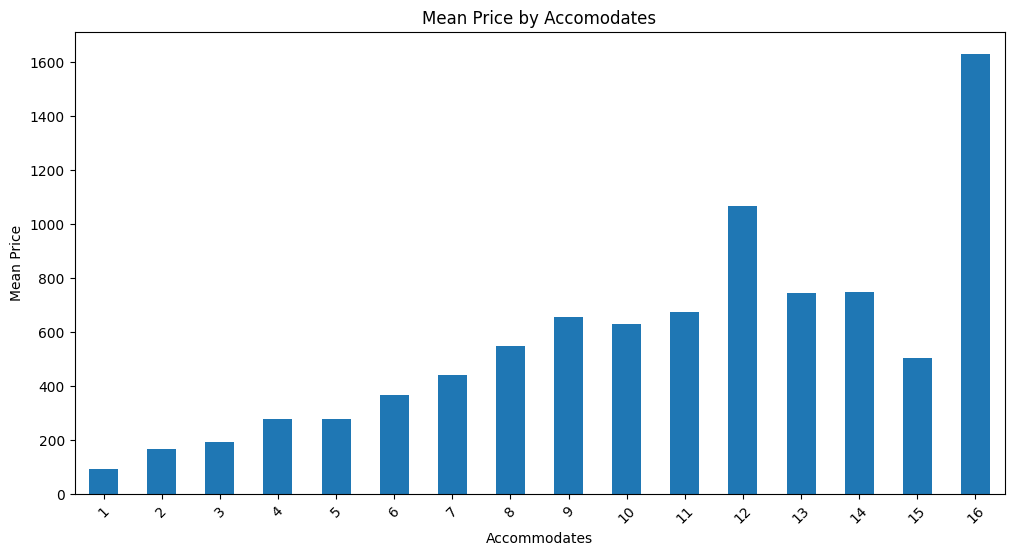

In [30]:
# Calculate the mean price for each 'availability_30'
mean_prices = df.groupby('accommodates')['price'].mean().sort_index()

# Plot the means
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
mean_prices.plot(kind='bar')  # Bar plot; you can also use 'line' for a line plot

# Add title and labels
plt.title('Mean Price by Accomodates')
plt.xlabel('Accommodates')
plt.ylabel('Mean Price')

# Optionally, rotate the x-tick labels for better legibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

c:\Users\heiwi\Documents\tdt4259-main\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\heiwi\Documents\tdt4259-main\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\heiwi\Documents\tdt4259-main\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


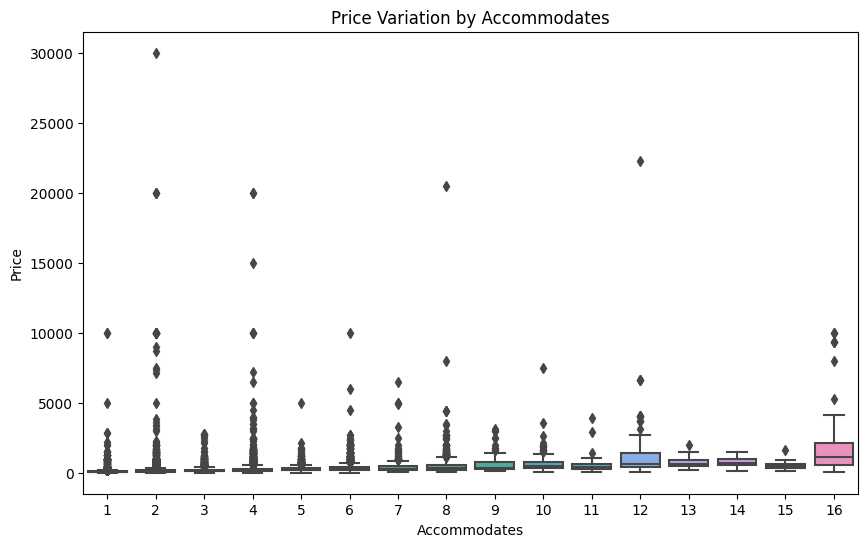

In [34]:
# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='accommodates', y='price', data=df)

# Set the title and labels
plt.title('Price Variation by Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Price')

# Display the plot
plt.show()


In [42]:
negative_price = df.loc[df['price'] == 30]
negative_price

,id,name,host_id,host_since,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,is_apartment,is_kitchen,is_manhattan,is_subway,is_train,is_quiet,is_furnished,is_heart,is_modern,is_wifi,is_renovated,is_laundry,is_desk,is_park,is_shop,is_luxury,is_safe,is_elevator,is_garden,is_parking,is_stylish,is_village,is_downtown,is_backyard,is_bus,is_transportation,is_museum,is_rooftop,is_cafe,is_dishwasher,is_airport,is_netflix,is_balcony,is_fridge,is_doorman,is_bar,is_oven,is_restaurant,is_old,is_supermarket,is_comfortable,host_position,type_apartment,type_entire,type_floor,type_hotel,type_dorm,type_villa,type_resort,type_train,type_hostel,type_home/apt,type_guest,type_vacation,type_guesthouse,type_tent,type_boat,type_aparthotel,type_cave,type_camper/rv,type_bed,type_building,type_unit,type_religious,type_breakfast,type_houseboat,type_condo,type_castle,type_suite,type_cottage,type_lighthouse,type_private,type_barn,type_in-law,type_place,type_room,type_tower,type_particular,type_rental,type_bungalow,type_home,type_townhouse,type_boutique,type_and,type_serviced,type_earthen,type_farm,type_stay,type_in,type_chalet,type_kezhan,type_casa,type_tiny,type_shared,type_loft,shared_bathroom,num_baths,has_alarm,has_dryer,has_wifi,has_smoke,has_heating,has_kitchen,has_water,has_coffee,has_conditioning,has_hangers,has_tv,has_parking,has_iron,has_shampoo,has_refrigerator,has_silverware,has_dishes,has_cooking,has_linens,has_microwave,has_workspace,has_oven,has_stove,has_extinguisher,has_washer,has_aid,has_pillows,has_blankets,has_bathtub,has_storage,has_table,has_freezer,has_soap,has_security,has_kettle,has_luggage,has_dishwasher,has_laundromat,has_elevator,has_conditioner,has_pets,has_shower,has_wine,has_glasses,has_toaster,has_lockbox,has_closet,has_ac,has_books,has_balcony,has_backyard,has_gym,has_furniture,has_netflix,has_ethernet,has_grill,has_bbq,has_fan,has_amazon,has_guards,has_fridge,has_games,has_skyline,has_fireplace,has_toys,has_breakfast,has_garage,has_hbo,has_pool,has_barbecue,has_tub,has_disney,has_bluetooth,has_wardrobe,imputed_review_score,RevPAR
396,48312829,Rental unit in Brooklyn · 1 bedroom · 1 bed · ...,255526462,2019-04-13,0,6.0,6.0,1,1,Bedford-Stuyvesant,Brooklyn,40.67862,-73.94888,private room in rental unit,Private room,1,1.0,1.0,30.0,30,365,t,0,0,0,0,1,0,0,2021-05-31,2021-05-31,5.00,f,4,0,4,0,0.04,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,"Crown Heights, Houston, TX",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.5,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,900.0
602,3655007,Home in Bronx · ★4.92 · 2 bedrooms · 1 bed · 1...,18492106,2014-07-20,0,2.0,2.0,1,1,Wakefield,Bronx,40.88805,-73.85311,private room in home,Private room,1,1.0,1.0,30.0,30,1125,t,0,0,0,0,12,0,0,2017-09-20,2018-09-15,4.92,f,1,0,1,0,0.16,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Wakefield, New York, NY",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1.0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,900.0
908,9821359,Rental unit in Queens · 1 bedroom · 1 bed ·

In [43]:
df.loc[df['availability_365'] == 0].count()

id                      13485
name                    13485
host_id                 13485
host_since              13485
host_is_superhost       13485
                        ...  
has_disney              13485
has_bluetooth           13485
has_wardrobe            13485
imputed_review_score    13485
RevPAR                  13485
Length: 211, dtype: int64

c:\Users\heiwi\Documents\tdt4259-main\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\heiwi\Documents\tdt4259-main\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\heiwi\Documents\tdt4259-main\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


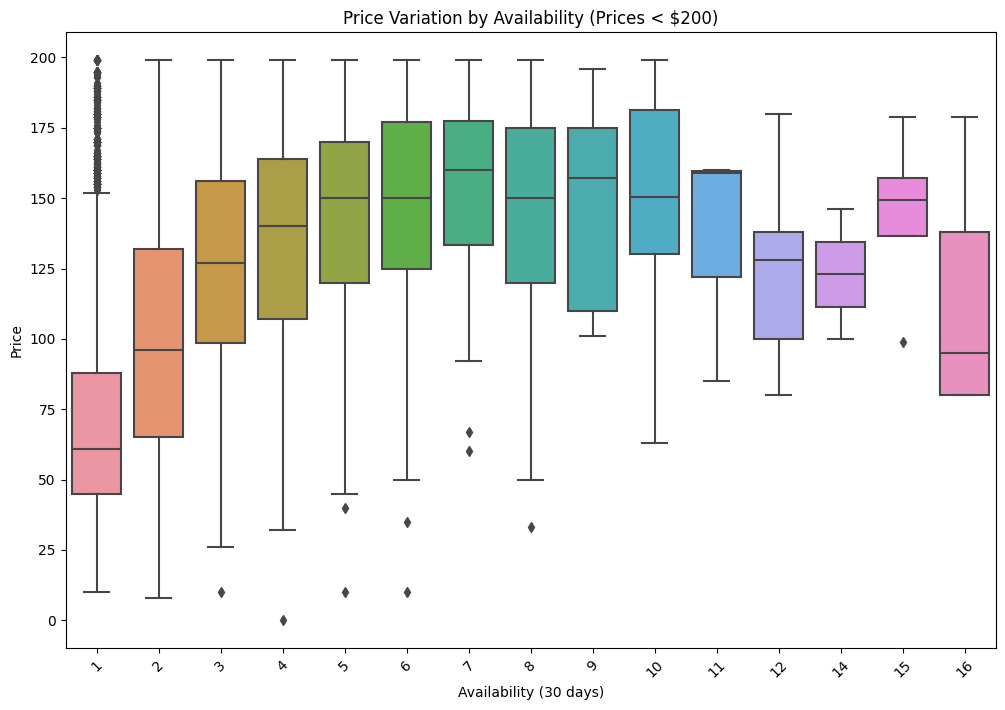

In [36]:
# Filter the DataFrame to include only rows with 'price' < 200
df_filtered = df[df['price'] < 200]

# Now plot using seaborn
plt.figure(figsize=(12, 8))  # Adjust the figure size as desired
sns.boxplot(x='accommodates', y='price', data=df_filtered)

plt.title('Price Variation by Availability (Prices < $200)')
plt.xlabel('Availability (30 days)')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate the x labels if they overlap or if there are many categories

plt.show()

In [37]:
# Assuming 'df' is your DataFrame

# Count the number of rows for each unique value of 'availability_30'
availability_counts = df_filtered['accommodates'].value_counts()

# Print the counts
# Print the counts sorted by the index (i.e., 'availability_30' value)
print(availability_counts.sort_index())



accommodates
1      6447
2     13438
3      2379
4      3092
5       599
6       599
7        84
8       145
9        13
10       12
11        3
12       23
14        2
15        4
16       17
Name: count, dtype: int64
